In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors 
import scipy.io #For loadmat
import copy

# k-means

In [2]:
#Function to load matlab file.
def parse_file(name):
    data = scipy.io.loadmat(name) #Parse the matlab file into dictionary
    return data

In [3]:
#Plotting the data
def plot_data(X):
    fig, ax = plt.subplots()
    fig.set_figheight(6)
    fig.set_figwidth(8)
    ax.scatter(X[:,0], X[:,1], s=5, marker = 'o')
    ax.grid()
    return(fig, ax)

In [4]:
#Plot data including colors
def plot_data_cluster(X, cluster_centers, labels):
    fig, ax = plt.subplots()
    fig.set_figheight(6)
    fig.set_figwidth(8)
    ax.scatter(X[:,0], X[:,1], s=5, marker = 'o', c = labels)
    ax.scatter(cluster_centers[:,0], cluster_centers[:,1], s=200, marker = '*', c=np.arange(len(cluster_centers)))
    ax.grid()
    return(fig, ax)

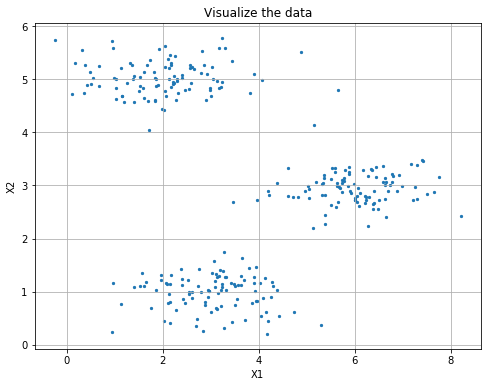

In [5]:
data = parse_file("ex7data2.mat")
fig, ax = plot_data(data['X'])
ax.set_title("Visualize the data")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
fig.show()

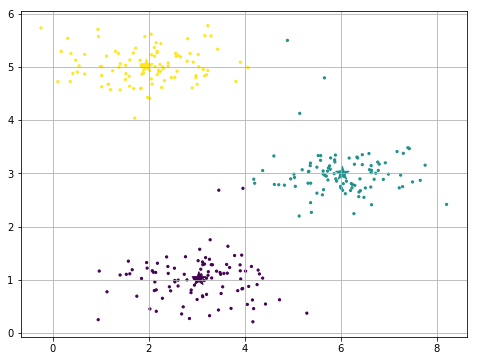

In [130]:
#Run preliminary analysis with Sklearn's module
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state = 0).fit(data['X'])
fig, ax = plot_data_cluster(data['X'], kmeans.cluster_centers_, kmeans.labels_)
fig.show()

In [131]:
#Creating my own k-means module
class Kmeans():
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        
    def fit(self, data):
        #Define the data
        self.data = data
        self.num_points = data.shape[0]
        self.features = data.shape[1]
        
        #Initialize some random centers.
        #We want to start within the dataset to minimize travel
        #In this module, we simply select from the random distribution
        self.mean = np.mean(self.data, axis = 0)
        self.std = np.std(self.data, axis = 0)
        self.centroids = np.random.randn(self.n_clusters,self.features)*self.std + self.mean
        
        self.labels = self.__find_closest_centroid(self.data, self.centroids)
        
        #Plot. 
        self.fig, self.ax = self.__plot_data_cluster(self.data, self.centroids, self.labels)
        self.fig.show()
        #return(data)
        
    def __find_closest_centroid(self, data, centroids):
        distance = np.zeros((self.num_points,self.n_clusters))
        c = 0
        for centroid in centroids:
            #print(data[0])
            #print(centroid)
            #print((data-centroid)[0])
            #Distance can be calculated using the norm. np.linalg.norm
            #distance.append(np.linalg.norm(data-centroid, axis = 1))
            #distance = np.append(distance, np.reshape(np.linalg.norm(data-centroid, axis = 1),(self.num_points,1)), axis = 1)
            distance[:,c] = np.linalg.norm(data-centroid, axis = 1)
            c += 1
        #Find which one has the minimum. 
        labels = np.argmin(distance, axis = 1) #Returns index of minimum value along axis.
        return(labels)
    
    def __plot_data_cluster(self, X, cluster_centers, labels):
        fig, ax = plt.subplots()
        fig.set_figheight(6)
        fig.set_figwidth(8)
        ax.scatter(X[:,0], X[:,1], s=5, marker = 'o', c = labels)
        ax.scatter(cluster_centers[:,0], cluster_centers[:,1], s=200, marker = '*', c=np.arange(len(cluster_centers)))
        ax.grid()
        return(fig, ax)
    
    #Function to plot the data
    def __plot_data(self, X, cluster_centers = None):
        fig, ax = plt.subplots()
        fig.set_figheight(6)
        fig.set_figwidth(8)
        ax.scatter(X[:,0], X[:,1], s=5, marker = 'o')
        ax.grid()
        return(fig, ax)
        

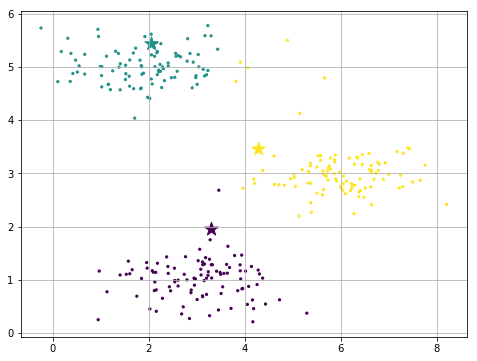

In [132]:
kmeans = Kmeans(n_clusters = 3)
kmeans.fit(data['X'])

dict_keys(['__header__', '__version__', 'Xval', 'X', '__globals__', 'yval', 'y'])

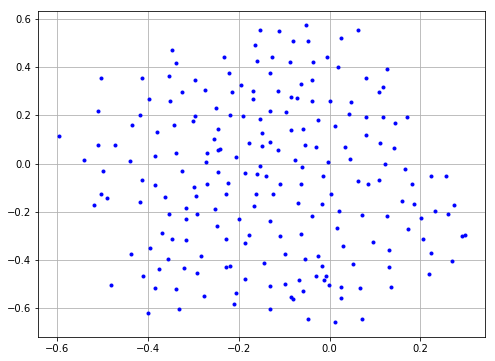

In [81]:
data = parse_file("ex6data3.mat")
plot_data(data['X'])
data.keys()